In [55]:
import numpy as np
import torch
import matplotlib.pyplot as plt

In [56]:
def generate_data():
  data = torch.rand(1000, 2)
  label = ((data[:,0]+0.3*data[:,1]) > 0.5).to(torch.int)
  return data[:,0], label

In [57]:
input, label = generate_data()

# Make minibatches.
inputs = torch.split(input, 32)
labels = torch.split(label, 32)

# Define the two variables to optimize
b1 = torch.autograd.Variable(torch.tensor([0.01]), requires_grad=True)
b2 = torch.autograd.Variable(torch.tensor([0.01]), requires_grad=True)

for epoch in range(15):
  for x, y in zip(inputs,labels):
    # Calculate p_x as per formula above
    p_x = 1 / (1 + torch.exp(-(b1 + b2 * x)))
    
    # Calculate the negative loss likelihood
    loss = -torch.sum(y * torch.log(p_x) + (1 - y) * torch.log(1 - p_x))
    
    # Calculate the gradient of the loss w.r.t. the inputs
    loss.backward()
    # print(f'b1 grad: {b1.grad}')
    # print(f'b2 grad: {b2.grad}')
    
    # Update the parameters b according to SGD formula
    b1 = torch.sub(b1, b1.grad, alpha=0.1)
    b1.retain_grad()
    b2 = torch.sub(b2, b2.grad, alpha=0.1)
    b2.retain_grad()
    
    # Print out the loss value
    print(loss)
    
# Reproduce the image above to validate your result.

tensor(22.0740, grad_fn=<NegBackward0>)
tensor(19.5612, grad_fn=<NegBackward0>)
tensor(15.9213, grad_fn=<NegBackward0>)
tensor(16.5136, grad_fn=<NegBackward0>)
tensor(18.8811, grad_fn=<NegBackward0>)
tensor(15.2760, grad_fn=<NegBackward0>)
tensor(19.0275, grad_fn=<NegBackward0>)
tensor(15.1774, grad_fn=<NegBackward0>)
tensor(14.3527, grad_fn=<NegBackward0>)
tensor(12.6695, grad_fn=<NegBackward0>)
tensor(13.3646, grad_fn=<NegBackward0>)
tensor(12.7085, grad_fn=<NegBackward0>)
tensor(10.0517, grad_fn=<NegBackward0>)
tensor(14.9068, grad_fn=<NegBackward0>)
tensor(14.0000, grad_fn=<NegBackward0>)
tensor(11.8073, grad_fn=<NegBackward0>)
tensor(10.6703, grad_fn=<NegBackward0>)
tensor(10.5801, grad_fn=<NegBackward0>)
tensor(9.3014, grad_fn=<NegBackward0>)
tensor(11.8976, grad_fn=<NegBackward0>)
tensor(10.0374, grad_fn=<NegBackward0>)
tensor(8.6021, grad_fn=<NegBackward0>)
tensor(10.3582, grad_fn=<NegBackward0>)
tensor(10.3247, grad_fn=<NegBackward0>)
tensor(9.9912, grad_fn=<NegBackward0>)
ten

tensor(3.9503, grad_fn=<NegBackward0>)
tensor(5.3063, grad_fn=<NegBackward0>)
tensor(3.0382, grad_fn=<NegBackward0>)
tensor(4.3589, grad_fn=<NegBackward0>)
tensor(4.3459, grad_fn=<NegBackward0>)
tensor(2.4990, grad_fn=<NegBackward0>)
tensor(6.0632, grad_fn=<NegBackward0>)
tensor(6.8839, grad_fn=<NegBackward0>)
tensor(4.1507, grad_fn=<NegBackward0>)
tensor(3.0962, grad_fn=<NegBackward0>)
tensor(5.7245, grad_fn=<NegBackward0>)
tensor(4.3351, grad_fn=<NegBackward0>)
tensor(2.5434, grad_fn=<NegBackward0>)
tensor(4.1335, grad_fn=<NegBackward0>)
tensor(3.2141, grad_fn=<NegBackward0>)
tensor(3.2021, grad_fn=<NegBackward0>)
tensor(5.5060, grad_fn=<NegBackward0>)
tensor(5.0569, grad_fn=<NegBackward0>)
tensor(6.1444, grad_fn=<NegBackward0>)
tensor(3.4568, grad_fn=<NegBackward0>)
tensor(5.5033, grad_fn=<NegBackward0>)
tensor(3.8542, grad_fn=<NegBackward0>)
tensor(6.1003, grad_fn=<NegBackward0>)
tensor(3.7995, grad_fn=<NegBackward0>)
tensor(0.5087, grad_fn=<NegBackward0>)
tensor(3.4055, grad_fn=<N

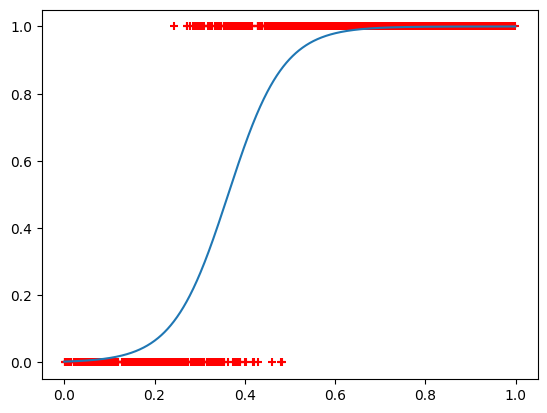

In [58]:
x = torch.arange(0, 1, 0.001)
pred = 1 / (1 + torch.exp(-(b1 + b2 * x)))

plt.scatter(input, label, color='red', marker='+')
plt.plot(x.tolist(), pred.tolist())
plt.show()